In [10]:
# Tasks
# 1. data extraction, column naming, value counts, summary stats, 
# 2. load full data (partial columns, full columns, random sample)
# 3. nlp on body, date counts, usr and msg distinct counts, skip
# 4. figure out what the max col usage is for, and what does each of the filler columns mean
# 5. json extraction

# Data Processing

In [11]:
# Read raw data and load fraction (p) 

INPATH = '/Users/pranjal/Downloads/part-00000-tid-7073521145656742331-3e06173f-1926-41aa-b3b7-847006329acc-4624-1-c000.csv'
column_names = ['userid', 'event', 'msgid', 'cts', 'body']
import pandas as pd
import random
p = 0.05
df = pd.read_csv(INPATH, 
                 error_bad_lines = False, 
                 names = column_names, 
                 #nrows = 100000,
                 skiprows=lambda i: i>0 and random.random() > p
                ) #skiprows = 460953, nrows = 200000)

df = df[1:]
print(df.shape)
df.head()

(921211, 5)


,userid,event,msgid,cts,body
1,02542fb7-9ee9-49f9-b17f-e7f6c841c9bb,UserSignedIn,a47fd3cc-c9db-432b-9f50-d8aa76bf35a5,2021-10-04T16:41:36.000Z,"{\deviceCode\"": \""a7ebd2ee-72aa-45fc-9825-246b..."
2,02542fb7-9ee9-49f9-b17f-e7f6c841c9bb,UserSignedIn,d0a2fb86-3f38-48f9-9106-61b2771f493d,2021-09-28T09:25:02.000Z,"{\deviceCode\"": \""a7ebd2ee-72aa-45fc-9825-246b..."
3,02542fb7-9ee9-49f9-b17f-e7f6c841c9bb,UserSignedIn,625cda9f-6a43-4070-9630-a3e6774c2690,2021-10-29T09:07:50.000Z,"{\deviceCode\"": \""a44e3f40-511c-452a-99c8-7be3..."
4,02650cc5-b4da-483a-96cc-4b6a5119a808,LoyaltyLevelChanged,390d362a-4b31-4a71-bba0-5b8165a12a27,2022-02-08T13:08:18.000Z,"{\currentLoyaltyLevel\"": \""Fan2\"""
5,02650cc5-b4da-483a-96cc-4b6a5119a808,TransactionConfirmed,6d8bc20c-ffb9-49bb-856e-68f683a5e9d5,2022-05-10T23:14:09.000Z,"{\rowId\"": 13102673"


In [12]:
# Cleaning the "Body" json
import json
def clean(x):
    x = x.replace("\\", "")
    x = x.replace("/", "")
    x = x + "}"
    x = x.replace("{", "{\"")
    x = x.replace("\\", "")
    x = x.replace("}", "\"}")
    x = x.replace(": ", ": \"")
    x = x.replace("\"\"", "\"")
    x = x.replace("\"}\"}", "\"}")
    #print(x)
    x = json.loads(x)
    return x

df['body_clean']= df['body'].apply(clean)
df['body_clean']

1         {'deviceCode': 'a7ebd2ee-72aa-45fc-9825-246bc5...
2         {'deviceCode': 'a7ebd2ee-72aa-45fc-9825-246bc5...
3         {'deviceCode': 'a44e3f40-511c-452a-99c8-7be335...
4                           {'currentLoyaltyLevel': 'Fan2'}
5                                     {'rowId': '13102673'}
                                ...                        
921207                                {'rowId': '13395160'}
921208                                {'rowId': '11201143'}
921209                  {'transactionId': 'ACLK2107477003'}
921210    {'userId': 'ffa18ab0-c2de-469b-9561-4f062d2660...
921211    {'deviceCode': 'a3a386be-edca-4950-9aed-7267d8...
Name: body_clean, Length: 921211, dtype: object

In [13]:
# Converting "body" Json contents into indivisual columns
import pandas as pd
df2 = pd.json_normalize(df['body_clean'])
df3 = df.join(df2)
df3.drop(['body', 'body_clean'], axis = 1, inplace = True)
df3['date'] = pd.to_datetime(df.cts).dt.date
df3['yearmonth'] = pd.to_datetime(df.cts).dt.to_period('M')
df3.head()

/usr/local/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,userid,event,msgid,cts,deviceCode,currentLoyaltyLevel,rowId,message,userId,transactionId,nudgeId,activationAmount,treeId,loyaltyLevel,cardType,creationDate,product,birthDate,date,yearmonth
1,02542fb7-9ee9-49f9-b17f-e7f6c841c9bb,UserSignedIn,a47fd3cc-c9db-432b-9f50-d8aa76bf35a5,2021-10-04T16:41:36.000Z,a7ebd2ee-72aa-45fc-9825-246bc55eabdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-04,2021-10
2,02542fb7-9ee9-49f9-b17f-e7f6c841c9bb,UserSignedIn,d0a2fb86-3f38-48f9-9106-61b2771f493d,2021-09-28T09:25:02.000Z,a44e3f40-511c-452a-99c8-7be335680c9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-28,2021-09
3,02542fb7-9ee9-49f9-b17f-e7f6c841c9bb,UserSignedIn,625cda9f-6a43-4070-9630-a3e6774c2690,2021-10-29T09:07:50.000Z,NaN,Fan2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-29,2021-10
4,02650cc5-b4da-483a-96cc-4b6a5119a808,LoyaltyLevelChanged,390d362a-4b31-4a71-bba0-5b8165a12a27,2022-02-08T13:08:18.000Z,NaN,NaN,13102673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-08,2022-02
5,02650cc5-b4da-483a-96cc-4b6a5119a808,TransactionConfirmed,6d8bc20c-ffb9-49bb-856e-68f683a5e9d5,2022-05-10T23:14:09.000Z,a070a268-5417-4450-9414-8cf98682c453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-10,2022-05


In [14]:
# Storing the data into event types
eventTypes = list(df3.event.value_counts().index)
OUTPATH = '/Users/pranjal/Downloads/'
for i in eventTypes:
    df3[df3.event == i].to_csv(OUTPATH + str(i) + '.csv')
df3.to_csv(OUTPATH + 'cleaned' + '.csv')

# Basic Analytics

In [15]:
# Null Counts
df3.isnull().sum()

userid                      0
event                       0
msgid                       0
cts                        73
deviceCode             370251
currentLoyaltyLevel    917431
rowId                  696331
message                891212
userId                 868862
transactionId          875442
nudgeId                914854
activationAmount       920573
treeId                 920096
loyaltyLevel           920866
cardType               920727
creationDate           920878
product                921140
birthDate              917081
date                       73
yearmonth                  73
dtype: int64

In [16]:
df3.event.value_counts()

UserSignedIn              550961
TransactionConfirmed      134379
EcoBalanceDataComputed     90501
NudgeCreated               82330
TransactionCreated         45769
NudgeRead                   6357
RiskLevelEvaluated          4225
LoyaltyLevelChanged         3780
TreeAcquired                1115
PhysicalCardRequested        994
SubscriptionActivated        800
Name: event, dtype: int64

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:>

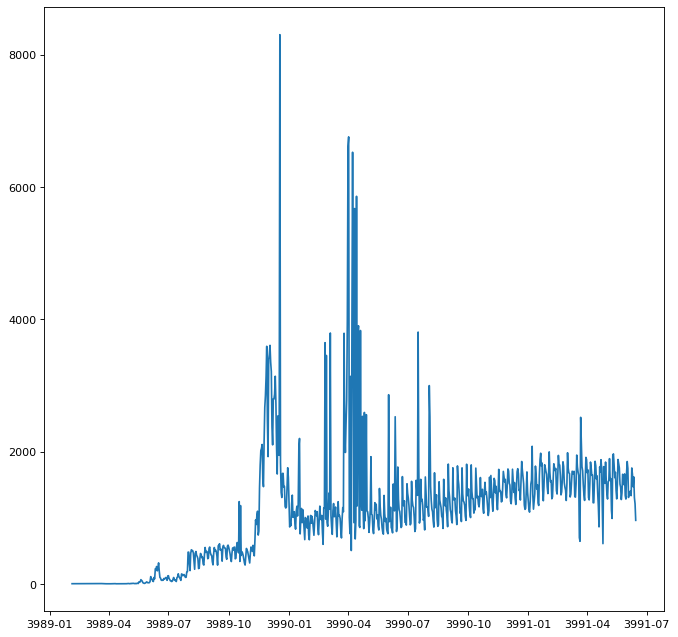

In [17]:
# Events over time
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
import matplotlib.pyplot as plt
df3.date.value_counts().plot()